In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.integrate as si
import numpy as np
from scipy.signal import find_peaks
import time
from datetime import datetime
from matplotlib import collections as matcoll
from pylab import rcParams

In [2]:
sns.set()
rcParams['figure.figsize'] = 10, 5

In [10]:
event = pd.read_csv('OneDrive/Desktop/mi note6 pro/BIKE_02Jan,2020-01-07-29_pm/Testing Data/allDetails.csv')
event.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.826828,6.356720,7.249115,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651614
1,0.776550,6.320801,7.359238,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651625
2,0.800491,6.289688,7.335297,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651637
3,0.886688,6.260956,7.397552,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651649
4,0.893875,6.256165,7.359238,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651659


In [11]:
len(event)

31058

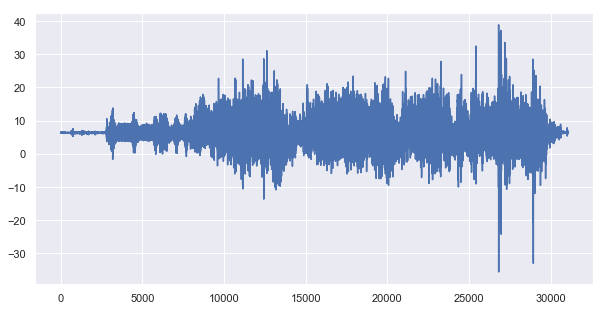

In [12]:
plt.plot(event.y)

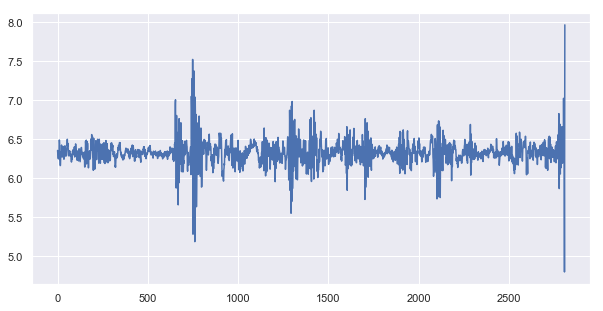

In [13]:
plt.plot(event.y[0:2810])

In [14]:
noise=0
for i in event.y[0:1690]:
    noise += i
av_noise = noise/len(event.y[0:1690])
av_noise

6.325451122840254

## normalisation

In [15]:
for i,j in zip(event.y, range(len(event.y))):
    event.loc[j, 'y'] = i - 6.325451122840254

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.826828,0.031269,7.249115,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651614
1,0.776550,-0.004650,7.359238,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651625
2,0.800491,-0.035763,7.335297,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651637
3,0.886688,-0.064495,7.397552,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651649
4,0.893875,-0.069287,7.359238,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651659
5,0.915421,-0.076473,7.241928,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651668
6,0.944153,-0.009426,7.261078,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651678
7,0.901047,0.028873,7.105454,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651686
8,0.841202,-0.016613,6.964203,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651696
9,0.841202,0.043232,7.024048,23.54377,87.28932,0.0,24.467554,6321,13:07:31 pm,1577950651704


In [16]:
# for i,j in zip(event.y, range(len(event.y))):
#     if(i<0):
#         event.loc[j, 'y'] = 0
#     if(i>30):
#         event.loc[j, 'y'] = 30

In [25]:
# plt.plot(event.y)

In [24]:
# plt.plot(event.y[0:2810])

In [23]:
# noise=0
# for i in event.y[0:2800]:
#     if(i>0):
#         noise += i
# av_noise = noise/len(event.y[0:2800])
# av_noise

In [22]:
# for i,j in zip(event.y, range(len(event.y))):
#     if(i<0):
#         event.loc[j, 'y'] = i+0.045446226684976776
#     if(i>0):
#         event.loc[j, 'y'] = i-0.045446226684976776
# event

In [27]:
# plt.plot(event.y)

## noise remove

In [28]:
def kalmanFilter(event):
    event = np.array(event)
    size = len(event)
    n_iter = size
   
    Q = 1e-5     # process variance
   
    xhat=np.zeros(size)      # a posteri estimate of x
    P=np.zeros(size)         # a posteri error estimate
    xhatminus=np.zeros(size) # a priori estimate of x
    Pminus=np.zeros(size)    # a priori error estimate
    K=np.zeros(size)         # gain or blending factor
   
    R = 0.1**2 # estimate of measurement variance, change to see effect

    # intial guesses
    xhat[0] = 0.0
    P[0] = 1.0
   
    for k in range(1,n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1]+Q
   
        # measurement update
        K[k] = Pminus[k]/( Pminus[k]+R )
        xhat[k] = xhatminus[k]+K[k]*(event[k]-xhatminus[k])
        P[k] = (1-K[k])*Pminus[k]
   
    return xhat

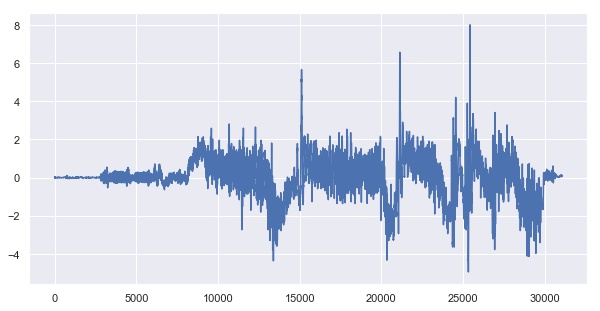

In [29]:
# plt.plot(event['y'])
plt.plot(kalmanFilter(event.y))
# plt.ylim(0,15)

In [30]:
kal_data = kalmanFilter(event.y)
kal_data[0],event.y[0]

(0.0, -0.01417734952523031)

## time concatenation

In [31]:
date_time = []
for index in event.index:
    p = pd.Timestamp(event.timestamp.loc[index],unit='ms',tz='Asia/Kolkata')
    date_time.append(p.time())
date_time[3]

datetime.time(13, 7, 31, 649000)

In [32]:
pd.Timestamp(1577950650219, unit='ms', tz='Asia/Kolkata').time()

datetime.time(13, 7, 30, 219000)

In [33]:
time = []
for i in range(len(date_time)):
    a = ((date_time[i].hour*3600 + date_time[i].minute*60 + date_time[i].second) + date_time[i].microsecond*10**(-6))
    time.append(a)
# time

In [34]:
ar = np.array(time)
event['time'] = ar
event.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.826828,-0.014177,7.249115,23.54377,87.28932,0.0,24.467554,6321,47251.614,1577950651614
1,0.776550,0.040796,7.359238,23.54377,87.28932,0.0,24.467554,6321,47251.625,1577950651625
2,0.800491,0.009683,7.335297,23.54377,87.28932,0.0,24.467554,6321,47251.637,1577950651637
3,0.886688,-0.019049,7.397552,23.54377,87.28932,0.0,24.467554,6321,47251.649,1577950651649
4,0.893875,-0.023840,7.359238,23.54377,87.28932,0.0,24.467554,6321,47251.659,1577950651659


In [44]:
vel = [0]
for t,t_next,a,a_next,v in zip((event.time[0:]),(event.time[1:]),(kal_data[0:]),(kal_data[1:]),(vel)):
#     if(a<a_next):
    if(a==6.326441543714309):
        v=v
    else:
        v = v + (t_next-t)*((a+a_next)/2)
#     elif(a>a_next):
#         v = v - (t_next-t)*((a_next+a)/2)
#     else:
#         v=v
    vel.append(v)

[0,
 0.00022215702310194384,
 0.0006151478491408804,
 0.0008282584641068415,
 0.0008895210218156454,
 0.0008763849435770323,
 0.0008630277276198644,
 0.0008689455092057879,
 0.0008815584596156744,
 0.0009041812438355674,
 0.0009726106547447201,
 0.0010412878406699587,
 0.0011127474762748942,
 0.001167131034734864,
 0.0012093704572031668,
 0.001214615012079704,
 0.0011809554151254499,
 0.0011363836147916151,
 0.0010737280625102207,
 0.001026448642539133,
 0.0009887579889141522,
 0.0009447365406799647,
 0.0009145736729106726,
 0.0008947286441743154,
 0.0008731745432965716,
 0.0008521618770314237,
 0.0008311376787151184,
 0.0008078401678940376,
 0.0007839595277229042,
 0.0007568793700047724,
 0.0007402234252416936,
 0.0007278909006857384,
 0.0007186166910249413,
 0.0007129897833847536,
 0.0007081659874463602,
 0.0006998387982809488,
 0.000688096262575358,
 0.0006783867588638382,
 0.0006623510769876174,
 0.0006512687783348709,
 0.0006414786990022465,
 0.0006319253260299005,
 0.000628050365

In [48]:
for i,j in zip(vel, range(len(vel))):
    vel[j] = i*3.6

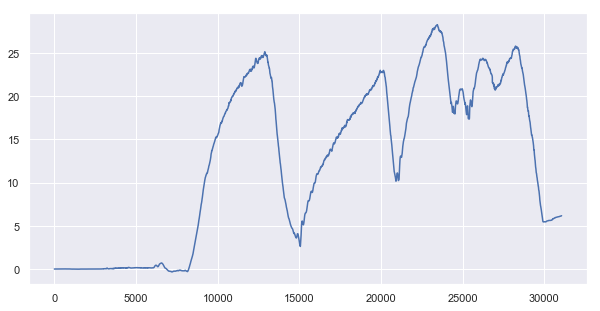

In [46]:
plt.plot(vel)

In [47]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)
av_vel

12.543640866610257

## with peaks

In [ ]:
y = np.array(event.y)  
t = np.array(time)
peaks, _= find_peaks(y, height=6.35)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [12]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

(array([6.3543243, 6.490799 , 6.4261475, ..., 6.507553 , 6.4261475,
        6.35672  ]),
 array([27451.686, 27451.712, 27451.764, ..., 27529.854, 27529.867,
        27529.874]))

In [13]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-6.35)
    else:
        v = v - (t_next-t_pre)*(a-6.35)
    vel.append(v)
# vel

[0,
 -0.00011243179999142904,
 0.007209116199963513,
 0.009341246200120869,
 0.007916303700245278,
 0.005918903700080542,
 0.00682109969971732,
 0.008579573699720172,
 0.008531356199717352,
 0.008392286199739607,
 0.00818346059969706,
 0.00791045059964144,
 0.008272535399715208,
 0.008144916999722366,
 0.007833997599761847,
 0.0060782370997316945,
 0.004589883099879696,
 0.005973916100161663,
 0.007068622099942184,
 0.009570834600087855,
 0.00952261710009205,
 0.008591672099902388,
 0.010483709700287861,
 0.013977619700330691,
 0.015438719300037753,
 0.015312098300053829,
 0.015014588899993218,
 0.017245267699970313,
 0.016731790900099207,
 0.018235450900405552,
 0.017899143500431154,
 0.019703535500798768,
 0.019606186500829525,
 0.021280572900850038,
 0.020831280700758507,
 0.021645971500595173,
 0.021573046700580314,
 0.0227267245004338,
 0.02341057550057312,
 0.022358372400653203,
 0.024629776400629876,
 0.02555894640048114,
 0.025980516400490355,
 0.02585283640048878,
 0.025730192

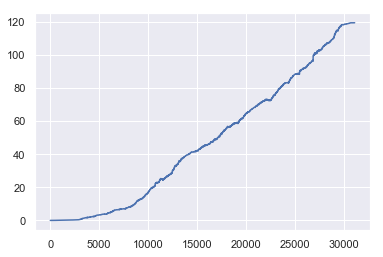

In [14]:
plt.plot(peaks,vel)

In [15]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)*3.6
av_vel

164.78675104214196

In [16]:
dis = []

for t,a in zip((time_peak),(y_peaks)):
    
    x = (1/2)*(a-6.35)*t**2
    dis.append(x)
# dis

[1629385.568151942,
 53052816.21961272,
 28692353.12686453,
 21476758.55330447,
 25087419.122263934,
 56658202.292735204,
 36810929.17376101,
 726739.1952579194,
 5240203.451343164,
 19671557.976015136,
 20574234.607655793,
 34108733.82277106,
 3434793.889643683,
 10650524.620706435,
 16963555.35101717,
 46735020.74691867,
 52151195.899866454,
 45832456.18785245,
 37714001.01127518,
 726748.0902843017,
 58464573.1298141,
 79215004.81278774,
 69291282.09556825,
 61172805.41801843,
 4337449.427735085,
 12456037.325867794,
 49443604.23773299,
 24185405.87169668,
 56659461.28617902,
 9748014.840144394,
 56659556.22723541,
 5240314.548025636,
 33206737.559799843,
 24185527.450186316,
 34109491.745969296,
 3434871.4647026663,
 39520036.224458985,
 36811988.51366296,
 30498766.68945829,
 50346806.58747762,
 35012424.1950405,
 7942679.176709118,
 2532195.4521671855,
 11553534.55791016,
 37714891.24894128,
 38617580.74776072,
 28693594.82791864,
 25088420.73486383,
 16964163.405880082,
 2779111

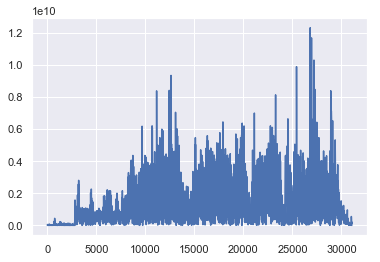

In [17]:
plt.plot(peaks,dis)

In [18]:
sum=0
for i in dis:
    sum += i
sum/len(dis)

1412250591.2768633

In [19]:
len(event)

31058

## window for acceleration

In [20]:
last_check = 0
data_frames = []

nums = []
for i in range(1, 33):
    nums.append(i*1000)

for index in nums:
    data_frames.append(event.loc[last_check:index-1])
    last_check = index

## First Test Case

(-40, 40)

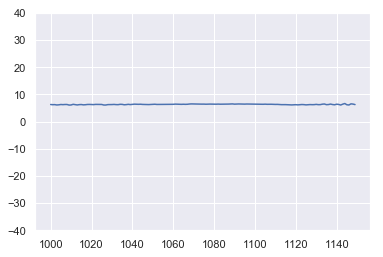

In [21]:
plt.plot(data_frames[1].y[0:150])
plt.ylim(-40,40)

In [22]:
y = np.array(data_frames[1].y[0:150])  
t = np.array(time[1000:1150])
peaks, _= find_peaks(y, height=6.35)

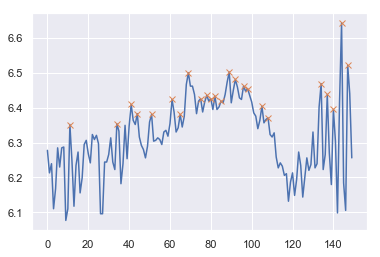

In [23]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [24]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

(array([6.3519287, 6.3543243, 6.4093933, 6.3830566, 6.380661 , 6.423752 ,
        6.380661 , 6.500366 , 6.4261475, 6.43573  , 6.4261475, 6.4333344,
        6.4189606, 6.502762 , 6.4812164, 6.4620667, 6.4548798, 6.404602 ,
        6.3710785, 6.4692535, 6.4381256, 6.3950195, 6.6440277, 6.5219116]),
 array([27454.133, 27454.19 , 27454.208, 27454.215, 27454.235, 27454.258,
        27454.268, 27454.281, 27454.298, 27454.302, 27454.305, 27454.313,
        27454.318, 27454.329, 27454.336, 27454.346, 27454.352, 27454.368,
        27454.379, 27454.443, 27454.45 , 27454.456, 27454.468, 27454.474]))

In [25]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-6.35)
    else:
        v = v - (t_next-t_pre)*(a-6.35)
    vel.append(v)
# vel

[0,
 -0.00010993589999436256,
 -0.00018777329999447947,
 0.00022797980009022048,
 0.0008891118001046537,
 0.00018390880007252276,
 0.0009214287999544654,
 0.0005228357999848018,
 0.00307905779995856,
 0.002774467799896506,
 0.0030316577999489045,
 0.002422477800101819,
 0.002839149800186711,
 0.0020805832000321657,
 0.0031499171996942797,
 0.004462081199961608,
 0.005134481399690901,
 0.006812558199651219,
 0.007413180199773582,
 0.00606415619980544,
 0.006898930699975513,
 0.007427684299762633,
 0.006887450299652567,
 0.008651616498942314]

(0, 60)

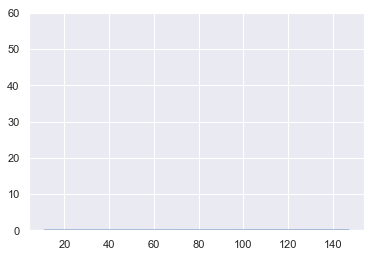

In [26]:
plt.plot(peaks,vel)
plt.ylim(0,60)

In [27]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)*3.6
av_vel

0.012236550929587883

In [28]:
dis = [0]
for t_pre,t_next,a,a_next,x,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(dis),(vel)):
    if(a>a_next):
        x = x + v*(t_next-t_pre) + (1/2)*(a-6.35)*(t_next-t_pre)**2
    else:
        x = x + v*(t_next-t_pre) - (1/2)*(a-6.35)*(t_next-t_pre)**2
    dis.append(x)
# dis

[0,
 -3.1331731496777554e-06,
 -5.812555949581665e-06,
 -5.671833199217903e-06,
 5.499082802974676e-06,
 1.783881970557433e-05,
 2.3365507704824607e-05,
 3.2753227603715276e-05,
 6.336932320291937e-05,
 7.507637440501453e-05,
 8.378556280655694e-05,
 0.00010560210520128343,
 0.0001187561742046846,
 0.00014581470571140096,
 0.00016412145710465885,
 0.00020218144911069214,
 0.00023097113689805884,
 0.0003265474536905357,
 0.00040478901490331205,
 0.0008360637796796425,
 0.0008814345838381191,
 0.0009244144288200296,
 0.001010305236434019,
 0.0010569224368110355]

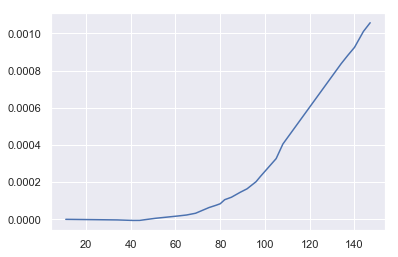

In [29]:
plt.plot(peaks,dis)
# plt.ylim(0,50)

In [30]:
sum=0
for i in dis:
    sum += i
av_dis = sum/len(dis)
av_dis

0.0002789580957641906

## Another Test Case

(-40, 40)

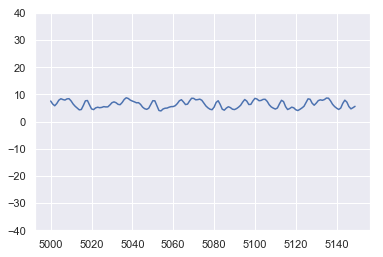

In [31]:
plt.plot(data_frames[5].y[0:150])
plt.ylim(-40,40)

In [32]:
y = np.array(data_frames[5].y[0:150])  
t = np.array(time[5000:5150])
peaks, _= find_peaks(y, height=6.35)

array([  5,   9,  18,  31,  37,  43,  50,  64,  69,  73,  82,  95, 100,
       105, 113, 126, 132, 135, 144], dtype=int64)

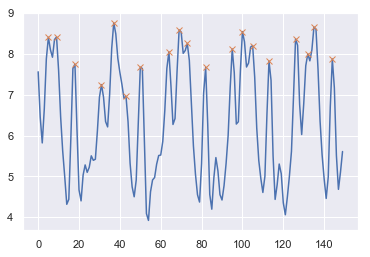

In [33]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
peaks

In [34]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

(array([8.406158 , 8.415726 , 7.747757 , 7.24736  , 8.762894 , 6.957657 ,
        7.673523 , 8.0542145, 8.5881195, 8.255325 , 7.6663513, 8.121246 ,
        8.547409 , 8.205048 , 7.8267517, 8.370239 , 8.001541 , 8.657547 ,
        7.8770294]),
 array([27464.157, 27464.166, 27464.189, 27464.222, 27464.238, 27464.252,
        27464.269, 27464.305, 27464.318, 27464.332, 27464.352, 27464.382,
        27464.397, 27464.409, 27464.43 , 27464.463, 27464.476, 27464.483,
        27464.505]))

In [35]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-6.35)
    else:
        v = v - (t_next-t_pre)*(a-6.35)
    vel.append(v)
# vel

[0,
 -0.01850542200377005,
 0.029006275990879214,
 0.07513225699519134,
 0.06077449699553084,
 0.09455501299363481,
 0.08422484399374089,
 0.03657801599366386,
 0.01442322749535022,
 0.04575690049359152,
 0.08386340049442328,
 0.044372861491166884,
 0.017804171492197863,
 0.044173079489575794,
 0.08312908749076356,
 0.03439628139158012,
 0.060659388389581036,
 0.04909860138722579,
 0.09986463538917342]

(0, 60)

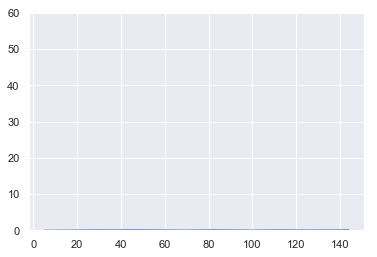

In [36]:
plt.plot(peaks,vel)
plt.ylim(0,60)

In [37]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)*3.6
av_vel

0.17797397986676852

In [38]:
dis = [0]
for t_pre,t_next,a,a_next,x,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(dis),(vel)):
    if(a>a_next):
        x = x + v*(t_next-t_pre) + (1/2)*(a-6.35)*(t_next-t_pre)**2
    else:
        x = x + v*(t_next-t_pre) - (1/2)*(a-6.35)*(t_next-t_pre)**2
    dis.append(x)
# dis

[0,
 -8.327439903393045e-05,
 3.74854218042252e-05,
 0.0017557712162350235,
 0.002843025248135091,
 0.003930331817998222,
 0.005449960602375306,
 0.007624412082152108,
 0.007955920164805466,
 0.008377181060704415,
 0.009673384070612856,
 0.011596928000555326,
 0.012063255747912466,
 0.012435119253766131,
 0.01377179200710045,
 0.015710960593626627,
 0.016328822447157144,
 0.016712975411454233,
 0.018351571016057486]

(0, 50)

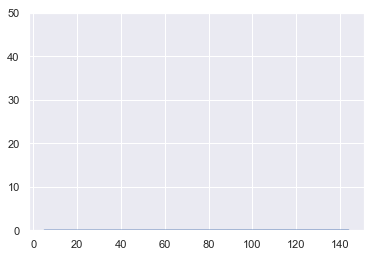

In [39]:
plt.plot(peaks,dis)
plt.ylim(0,50)

In [40]:
sum=0
for i in dis:
    sum += i
sum/len(dis)

0.008659769566495718

## Another Test Case

(-40, 40)

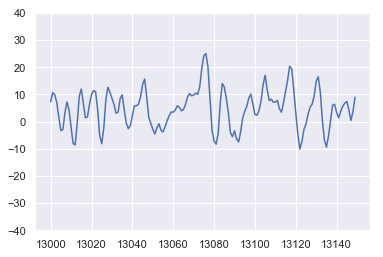

In [41]:
plt.plot(data_frames[13].y[0:150])
plt.ylim(-40,40)

In [42]:
y = np.array(data_frames[13].y[0:150])  
t = np.array(time[13000:13150])
peaks, _= find_peaks(y, height=6.35)

array([  1,   8,  15,  21,  28,  35,  46,  68,  71,  76,  84,  98, 105,
       108, 111, 117, 131, 139, 145], dtype=int64)

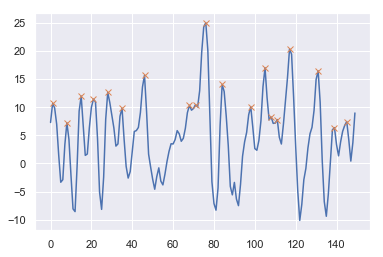

In [43]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
peaks

In [44]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

(array([10.659103 ,  7.2282104, 11.983093 , 11.432419 , 12.617554 ,
         9.825912 , 15.662979 , 10.326309 , 10.46756  , 25.009949 ,
        14.034927 , 10.108429 , 17.02768  ,  8.250534 ,  7.7980347,
        20.367584 , 16.462646 ,  6.363907 ,  7.448471 ]),
 array([27484.288, 27484.305, 27484.323, 27484.338, 27484.355, 27484.372,
        27484.4  , 27484.456, 27484.465, 27484.478, 27484.499, 27484.533,
        27484.553, 27484.558, 27484.566, 27484.583, 27484.616, 27484.636,
        27484.651]))

In [45]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-6.35)
    else:
        v = v - (t_next-t_pre)*(a-6.35)
    vel.append(v)
# vel

[0,
 0.07325475099924754,
 0.057446963799221956,
 0.14194335879594305,
 0.05554223579683057,
 0.16209065379573612,
 0.06476511778855361,
 0.586291941759281,
 0.5505051607519903,
 0.4969768807560647,
 0.8888358097680124,
 1.1501233277653284,
 1.0749547477636876,
 1.1283431477745642,
 1.1435474197707476,
 1.1189308298710003,
 1.5815111019142447,
 1.7837640218818698,
 1.7835554168818273]

(0, 60)

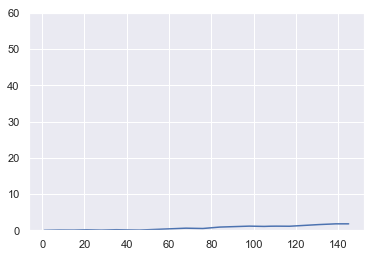

In [46]:
plt.plot(peaks,vel)
plt.ylim(0,60)

In [47]:
sum=0
for i in vel:
    sum += i
sum/len(vel)*3.6

2.6227672839727867

In [48]:
dis = []

for t,a,v in zip((timestamp_peak),(y_peaks),(vel)):
    x=0
    x = (1/2)*(a-6.35)*t**2
    dis.append(x)
dis

NameError: name 'timestamp_peak' is not defined

In [ ]:
plt.plot(peaks,dis)
plt.ylim(0,50)

In [ ]:
sum=0
for i in dis:
    sum += i
sum/len(dis)

## Another Test Case

In [ ]:
plt.plot(data_frames[26].y[750:900])
plt.ylim(-40,40)

In [ ]:
y = np.array(data_frames[26].y[750:900])  
t = np.array(time[26750:26900])
peaks, _= find_peaks(y, height=6.35)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

In [ ]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-6.35)
    else:
        v = v - (t_next-t_pre)*(a-6.35)
    vel.append(v)
vel

In [ ]:
plt.plot(peaks,vel)
plt.ylim(0,60)

In [ ]:
sum=0
for i in vel:
    sum += i
(sum/len(vel))*3.6

In [ ]:
dis = []

for t,a,v in zip((timestamp_peak),(y_peaks),(vel)):
    x=0
    x = (1/2)*a*t**2
    dis.append(x)
dis

In [ ]:
plt.plot(peaks,dis)
plt.ylim(0,50)

In [ ]:
sum=0
for i in dis:
    sum += i
(sum/len(dis))*3.6

## Another Test Case

In [ ]:
plt.plot(data_frames[20].y[0:150])
plt.ylim(-40,40)

In [ ]:
y = np.array(data_frames[20].y[0:150])  
time = np.array(data_frames[20].timestamp[0:150])
peaks, _= find_peaks(y, height=6.35)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
timestamp_peak = time[peaks]*10**(-12)
y_peaks,timestamp_peak

In [ ]:
vel = []

for t,a in zip((timestamp_peak),(y_peaks)):
    v=0
    v = t*(a-6.35)
    vel.append(v)
vel

In [ ]:
plt.plot(peaks,vel)
plt.ylim(0,60)

In [ ]:
sum=0
for i in vel:
    sum += i
(sum/len(vel))*3.6

In [ ]:
dis = []

for t,a,v in zip((timestamp_peak),(y_peaks),(vel)):
    x=0
    x = (1/2)*a*t**2
    dis.append(x)
dis

In [ ]:
plt.plot(peaks,dis)
plt.ylim(0,50)

In [ ]:
sum=0
for i in dis:
    sum += i
(sum/len(dis))

## another test case

In [ ]:
plt.plot(data_frames[15].y[0:150])

In [ ]:
y = np.array(data_frames[15].y[0:150])  
time = np.array(data_frames[15].timestamp[0:150])
peaks, _= find_peaks(y, height=6.35)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
timestamp_peak = time[peaks]*10**(-12)
y_peaks,timestamp_peak

In [ ]:
vel = []

for t,a in zip((timestamp_peak),(y_peaks)):
    v=0
    v = t*(a-6.35)
    vel.append(v)
vel

In [ ]:
sum=0
for i in vel:
    sum += i
(sum/len(vel))*3.6

In [ ]:
dis = []

for t,a,v in zip((timestamp_peak),(y_peaks),(vel)):
    x=0
    x = (1/2)*a*t**2
    dis.append(x)
dis

In [ ]:
plt.plot(peaks,dis)
plt.ylim(0,50)

In [ ]:
sum=0
for i in dis:
    sum += i
(sum/len(dis))

## Another test case

In [ ]:
plt.plot(data_frames[15].y[200:350])
# plt.ylim(-40,40)

In [ ]:
y = np.array(data_frames[15].y[200:350])  
t = np.array(time[15200:15350])
peaks, _= find_peaks(y, height=6.35)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

In [ ]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-6.35)
    else:
        v = v - (t_next-t_pre)*(a-6.35)
    vel.append(v)
vel

In [ ]:
# vel = []

# for t,a in zip((time_peak),(y_peaks)):
#     v=0
#     v = t*(a-6.35)
#     vel.append(v)
# vel

In [ ]:
plt.plot(peaks,vel)
# plt.ylim(0,60)

In [ ]:
sum=0
for i in vel:
    sum += i
av_vel = (sum/len(vel))
av_vel*3.6

In [ ]:
dis = []

for t,a in zip((time_peak),(y_peaks)):
    x=0
    x = (1/2)*a*t**2
    dis.append(x)
dis

In [ ]:
sum=0
for i in dis:
    sum += i
(sum/len(dis))

## Using GPS

In [ ]:
R = 6371
lat1 = math.radians(data_frames[15].latitude[15200])
lon1 = math.radians(data_frames[15].longitude[15200])

lat2 = math.radians(data_frames[15].latitude[15350])
lon2= math.radians(data_frames[15].longitude[15350])

change_lat = math.radians(data_frames[15].latitude[15350] - data_frames[15].longitude[15200])
change_lon = math.radians(data_frames[15].longitude[15350] - data_frames[15].longitude[15200])

t_s1 = time[15200]/3600
t_s2 = time[15350]/3600
change_t_s = (t_s2-t_s1)

In [ ]:
change_t_s

In [ ]:
a = math.sin(change_lat / 2.0) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(change_lon / 2.0) ** 2
a

In [ ]:
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
c

In [ ]:
dis = R * c
dis

In [ ]:
vel = (dis / change_t_s)
vel